# Entscheidungsbaum-Klassifikation mit dem Iris-Datensatz
In diesem Notebook wird ein **Entscheidungsbaum** mit dem Iris-Datensatz
trainiert, evaluiert und visualisiert. Der Fokus liegt auf Interpretierbarkeit
und praktischer Anwendung klassischer ML-Methoden.

- Entscheidungsbäume sind ein zentrales Werkzeug des maschinellen Lernens
- sie sind leicht interpretierbar, visualisierbar und robust gegenüber fehlenden Werten
- hier wird ein Entscheidungsbaum zur Klassifikation mit dem Iris-Datensatz aufgebaut

## Bibliotheken importieren und Daten laden

In [2]:
import pandas as pd
file_path = '../data/processed/iris.csv'
df = pd.read_csv(file_path, sep = ',')

Der Iris-Datensatz stammt aus dem UCI Machine Learning Repository.
Er enthält Messdaten zu Kelch- und Blütenblättern dreier Iris-Arten.
Ziel ist die Vorhersage der Art ('species') anhand von vier Merkmalen:

 - sepal_length, sepal_width, petal_length, petal_width

Die Daten werden aus einer CSV-Datei geladen:
- 'file_path' muss auf die CSV-Datei zeigen
- Trennzeichen ist Semikolon (;)

Für die spätere Modellierung mit einem Entscheidungsbaum:
- X enthält alle erklärenden Variablen
- y enthält das Klassenlabel (species)

## Feature-Ziel-Trennung

Aufteilen in Merkmale (X) und Zielvariable (y)
- die Zielvariable 'species' soll vorhergesagt werden
- alle anderen Spalten werden als Prädiktoren verwendet

In [3]:
features = [c for c in df.columns if c != 'species']
X = df[features]
y = df['species']

## Aufteilen in Trainings- und Testdaten

Wichtig: Testdaten dürfen nicht im Training verwendet werden, um mögliches
Overfitting zu erkennen

In [4]:
from sklearn.model_selection import train_test_split
X_tr, X_tst, y_tr, y_tst = train_test_split(
    X, y, test_size = 0.2, random_state = 42, stratify = y
)

Die Funktion train_test_split mischt die Daten zufällig und teilt sie auf:
- `X_tr`, `y_tr`: Trainingsdaten (`80 %`)
- `X_tst`, `y_tst`: Testdaten (`20 %`)
- `random_state` sorgt für Reproduzierbarkeit
- `stratify = y` sorgt für gleiche Klassenverteilung in Train und Test

## Entscheidungsbaum definieren und trainieren

- Importieren des `DecisionTreeClassifier` aus scikit-learn
- diese Klasse implementiert den CART-Algorithmus zur Klassifikation
- standardmäßig wird das Kriterium "gini" verwendet (Gini-Unreinheit)
- Alternative: z. B. 'entropy' für die ID3-ähnliche Variante

Trainieren des Modells mit den Trainingsdaten
- `X_tr`: Merkmale der Trainingsdaten (`n_samples` x `n_features`)
- `y_tr`: Klassenlabels der Trainingsdaten (`n_samples`)

Die Methode `.fit()` baut den Entscheidungsbaum rekursiv auf:
- wählt pro Knoten das optimale Feature zur Aufteilung
- verwendet dabei ein Gütemaß (Gini oder Entropie)
- stoppt, wenn Tiefe oder Datenmenge zu gering wird

In [5]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_tr, y_tr)

DecisionTreeClassifier()

### Hinweise:

Der DecisionTreeClassifier basiert auf dem CART-Algorithmus:
- "Greedy"-Verfahren: trifft lokal optimale Entscheidungen beim Splitten
- verwendet standardmäßig den Gini-Index zur Messung der Reinheit

Alternative Kriterien:
- `criterion = 'entropy'`: verwendet Informationsgewinn, ähnlich ID3
- geeignet für kategoriale Merkmale, erzeugt aber oft tiefere Bäume

Wichtige Parameter zur Steuerung der Baumkomplexität:
- `max_depth`: maximale Tiefe des Baumes
- `min_samples_split`: minimale Anzahl von Beispielen, um einen Knoten zu teilen
- `min_samples_leaf`: minimale Anzahl von Beispielen in einem Blatt
- `max_features`: maximale Anzahl der Merkmale, die beim Split berücksichtigt werden
- `ccp_alpha`: Kostenkomplexitäts-Pruning-Parameter (zur Vermeidung von Overfitting)

Beispiel für Pruning:
`model = DecisionTreeClassifier(ccp_alpha = 0.05)`

Wichtig:
- `.fit(X, y)` darf nur auf den Trainingsdaten aufgerufen werden!
- Ein mehrfaches Aufrufen mit verschiedenen Daten führt zu Overfitting

## Vorhersage auf Testdaten

- das Modell ist bisher nur auf den Trainingsdaten `X_tr`, `y_tr` trainiert worden
- nun wenden wir es auf neue, ungesehene Daten an, um seine Generalisierbarkeit
zu prüfen
- `predict()` nimmt als Input die Merkmalsmatrix `X_tst` (Form:
`[n_samples, n_features]`) und gibt ein 1D-Array mit den vorhergesagten
Klassenlabels zurück

In [6]:
y_predicted = model.predict(X_tst)

## Konfusionsmatrix erstellen

Die Matrix ist quadratisch: (`n_classes` x `n_classes`)
- die confusion_matrix vergleicht wahre Klassenlabels (`y_tst`)
- mit den vom Modell vorhergesagten Labels (`y_predicted`)
- Zeilen: wahre Klassen
- Spalten: vorhergesagte Klassen
- Diagonalelemente: korrekt klassifizierte Instanzen
- Off-Diagonalelemente: Fehlklassifikationen

In [7]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_tst, y_predicted)
print('Confusion Matrix:')
print(matrix)

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


### Interpretation:
- Je höher die Diagonaleinträge im Vergleich zu den Nebendiagonalen, desto besser
- Analyse zeigt, welche Klassen verwechselt werden
- Besonders wichtig bei Klassen mit ähnlicher Ausprägung oder bei Imbalancen

## Klassifikationsbericht

- classification_report gibt eine Übersicht über die wichtigsten Metriken:
- precision: Anteil der korrekt vorhergesagten Positiven `= TP / (TP + FP)`
- recall (Sensitivität): Anteil der erkannten Positiven unter allen
tatsächlichen Positiven `= TP / (TP + FN)`
- f1-score: harmonisches Mittel aus precision und recall
- support: Anzahl der wahren Instanzen pro Klasse

In [8]:
from sklearn.metrics import classification_report
report = classification_report(
    y_tst, y_predicted, digits = 3) #3 Nachkommastellen
print('Classification Report:')
print(report)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        10
Iris-versicolor      0.900     0.900     0.900        10
 Iris-virginica      0.900     0.900     0.900        10

       accuracy                          0.933        30
      macro avg      0.933     0.933     0.933        30
   weighted avg      0.933     0.933     0.933        30



### Detaillierte Erläuterungen zu den Metriken

1. Precision:
Gibt an, wie zuverlässig positive Vorhersagen sind.
Wichtig, wenn falsch-positive Ergebnisse vermieden werden sollen.
Beispiele:
- Spamfilter (falsch-positive = wichtige Mails fälschlich als Spam)
- medizinische Tests (gesunde Patienten fälschlich als krank)
- Betrugserkennung (legitime Transaktionen blockiert)

2. Recall:
Gibt an, wie viele der tatsächlichen Positiven erkannt wurden.
Wichtig, wenn falsch-negative Ergebnisse vermieden werden sollen.
Beispiele:
- Cybersicherheit (unerkannter Angriff = großes Risiko)
- Krankheitsdiagnose (kranker Patient nicht erkannt)
- Verbrechensaufdeckung (unerkannte Straftat)

3. F1-Score:
Kombiniert precision und recall -> Kompromissmaß. Sinnvoll bei:
- Imbalancierten Klassen
- Zielkonflikten zwischen precision und recall

4. macro avg:
Ungewichteter Durchschnitt der Metriken über alle Klassen weighted avg:
Durchschnitt über Klassen unter Berücksichtigung des supports (Klassenhäufigkeit)

### Gesamtziel:
- hohe Werte bei precision, recall und f1-score -> gutes, ausgewogenes Modell
- Einseitige Schwächen (z. B. recall niedrig bei einer Klasse) -> gezielte
 Nachjustierung nötig

## Visualisierung des Entscheidungsbaums

1. Import der benötigten Visualisierungsbibliotheken
2. Erzeugen einer neuen Figure für den Plot
    - mit `plt.figure()` wird ein neuer Grafikbereich erzeugt
    - der Parameter `figsize` steuert die Abmessung in Zoll: (Breite, Höhe)
    - hier: 12 Zoll breit, 8 Zoll hoch -> gut geeignet für größere Bäume
3. `plot_tree()` erzeugt eine visuelle Darstellung des gesamten Entscheidungsbaums
4. Parameter:
    - `model`: das trainierte DecisionTreeClassifier-Modell
    - `feature_names`: Liste mit Namen der Eingabemerkmale (X-Spaltennamen)
    - `class_names`: Klassenbezeichner für die Zielvariable
    - `filled = True`: Knoten werden eingefärbt nach dominierender Klasse
    - `rounded = True`: Knoten haben abgerundete Ecken → bessere Lesbarkeit
    - `fontsize = 6`: Schriftgröße innerhalb der Baumknoten
5. Anzeigen der Grafik: `plt.show()` öffnet ein neues Fenster (oder zeigt
inline in Jupyter die Grafik); ohne `plt.show()` wird der Baum zwar intern
erstellt, aber nicht sichtbar gemacht

### Optional:
Plot als Datei speichern (nach `plt.show()`)
- das Format wird automatisch aus dem Dateinamen abgeleitet
- Beispiel: PNG für Präsentationen, PDF für Publikationen
- Parameter:
    + `dpi = 300`: hohe Auflösung, gut für Druck
    + `bbox_inches = 'tight'`: reduziert unnötigen Rand

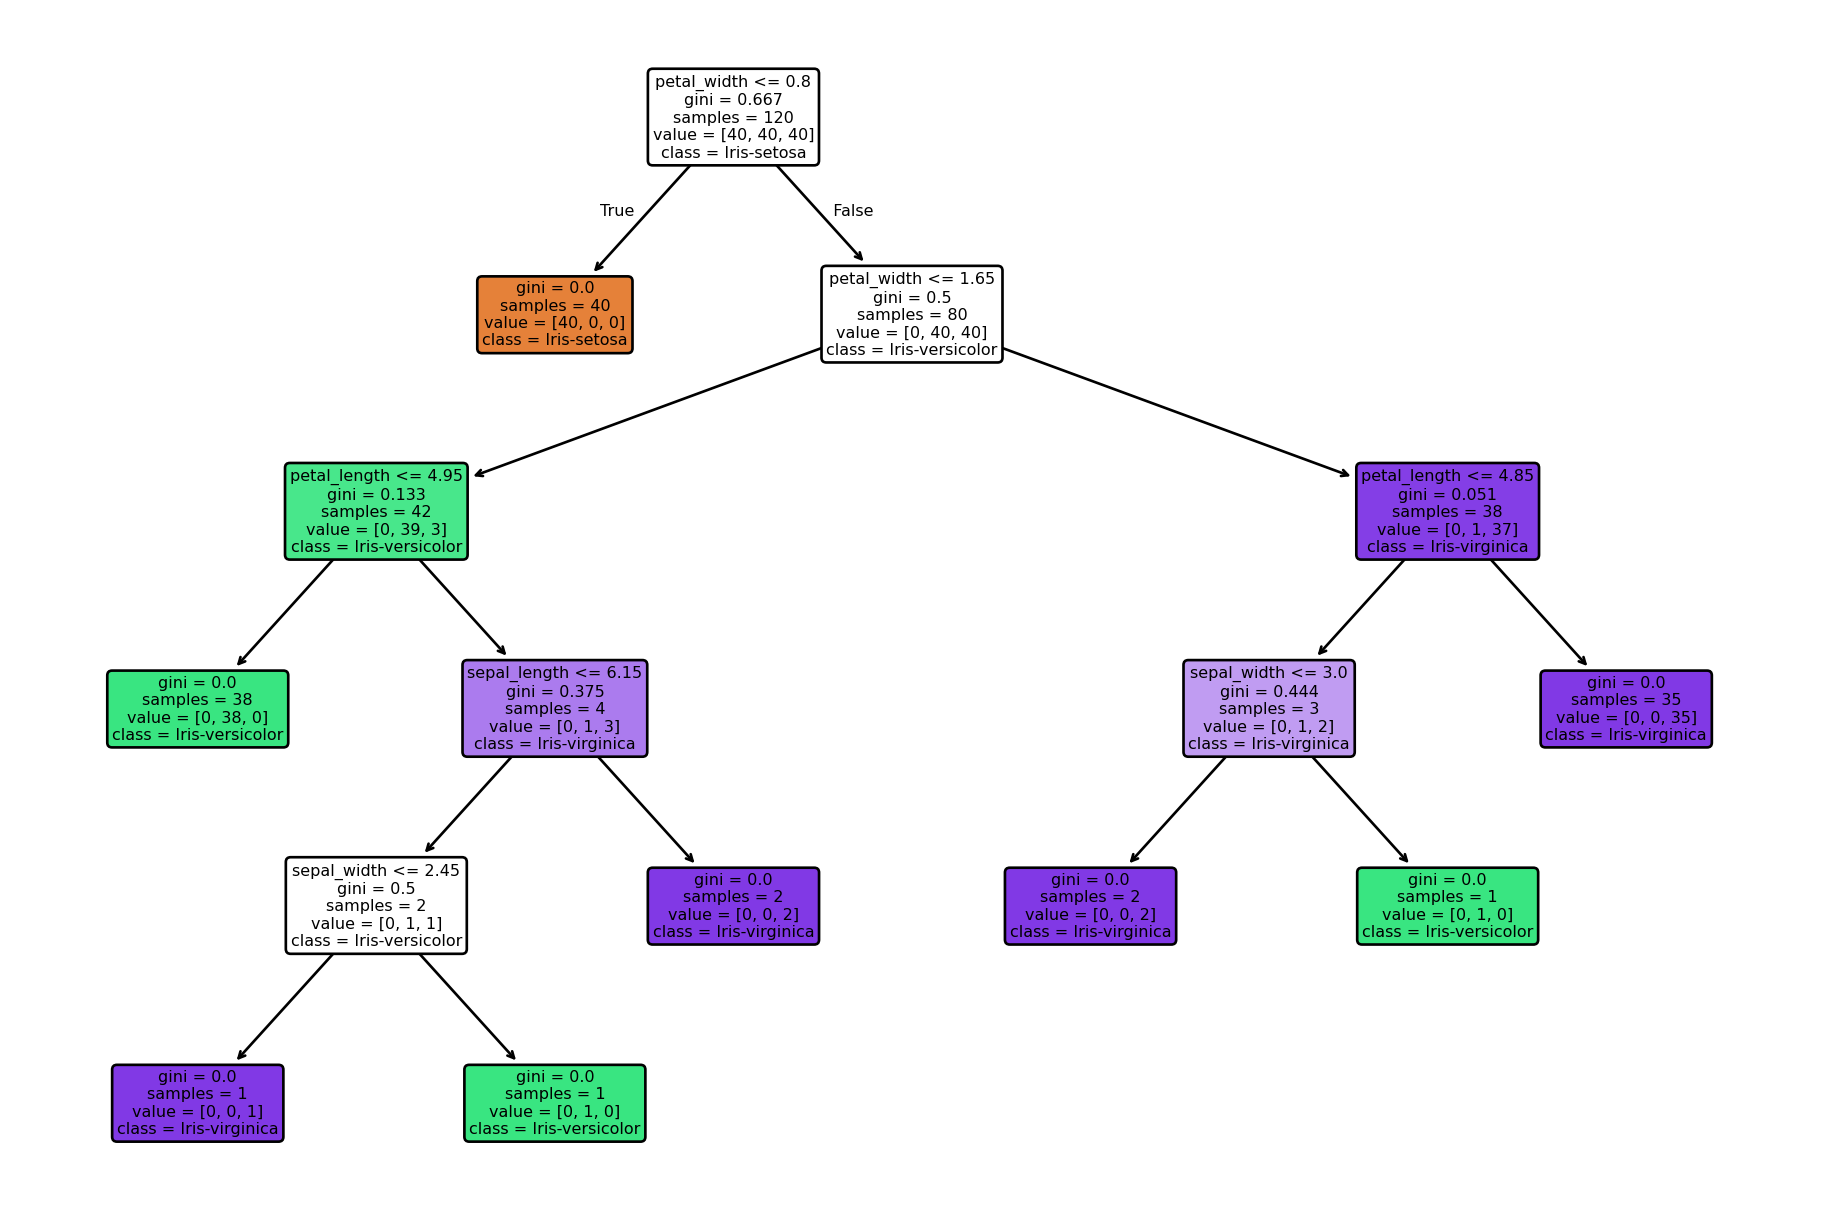

<Figure size 672x480 with 0 Axes>

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(
    model,
    feature_names=features,
    class_names=model.classes_,
    filled=True,
    rounded=True,
    fontsize=6
)
plt.show()
plt.savefig('../figs/baumstruktur.png', dpi=300, bbox_inches='tight')

### Zusatzhinweise zur Interpretation und Verwendung

Die Darstellung hilft, das Entscheidungsverhalten des Modells nachzuvollziehen:
    - Jeder Knoten zeigt die Aufspaltung basierend auf einem Merkmal (feature)
    - "gini" zeigt die Unreinheit im Knoten (je näher an 0, desto reiner)
    - "samples": Anzahl der Trainingsdaten im Knoten
    - "value": Verteilung der Klassen im Knoten
    - Farbe: stärker gefärbte Knoten = klar dominierende Klasse
    - `ccp_alpha` kann verwendet werden, um Pruning zu steuern und Overfitting
    zu vermeiden

Einsatzmöglichkeiten:
    - Modellinterpretation (z. B. bei erklärungsbedürftigen Anwendungen)
    - Fehleranalyse (z. B. bei Überanpassung durch zu tiefe Bäume)
    - Kommunikation in Präsentationen oder Berichten

Alternative Ausgabe:

Falls du eine PDF-Datei des Baums erzeugen willst, kannst du auch
export_graphviz() mit graphviz verwenden (z. B. für komplexere Bäume).
Dies ist besonders nützlich bei tiefen Bäumen, die mit plot_tree() schwer lesbar sind.